In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset

In [3]:
#import the data into a Dataframe
data = pd.read_csv("C:/Users/Saidul/Desktop/911_Capstone_Project/911.csv")
data.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
423904,40.139993,-75.049864,BUCK RD & WOODWARD DR; LOWER MORELAND; 2018-11...,19006.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:54:08,LOWER MORELAND,BUCK RD & WOODWARD DR,1
423905,40.270121,-75.382825,OAK DR & MOYER RD; LOWER SALFORD; 2018-11-16 @...,19438.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:53:32,LOWER SALFORD,OAK DR & MOYER RD,1
423906,40.270121,-75.382825,OAK DR & MOYER RD; LOWER SALFORD; 2018-11-16 @...,19438.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:54:19,LOWER SALFORD,OAK DR & MOYER RD,1
423907,40.190946,-75.237285,SUMNEYTOWN PIKE & WELLINGTON DR; LOWER GWYNEDD...,19002.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:51:48,LOWER GWYNEDD,SUMNEYTOWN PIKE & WELLINGTON DR,1
423908,40.155164,-75.264665,HOFFMAN ; LOWER GWYNEDD; 2018-11-16 @ 08:46:25;,19422.0,Traffic: DISABLED VEHICLE -,2018-11-16 08:46:25,LOWER GWYNEDD,HOFFMAN,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        423909 non-null  float64
 1   lng        423909 non-null  float64
 2   desc       423909 non-null  object 
 3   zip        371780 non-null  float64
 4   title      423909 non-null  object 
 5   timeStamp  423909 non-null  object 
 6   twp        423750 non-null  object 
 7   addr       423909 non-null  object 
 8   e          423909 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [6]:
#checking the null value
data.isnull().sum()

lat              0
lng              0
desc             0
zip          52129
title            0
timeStamp        0
twp            159
addr             0
e                0
dtype: int64

We see that there are many missing data points for zip code and some for the township. Therefore, if we look at the top values in zip codes and townships, we have to keep in mind that much of the zip code data and some of the township data is missing.

In [9]:
#top 5 zip codes for 911 calls from the data
data['zip'].value_counts().head()

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

In [10]:
#top township for 911 calls from the data
data['twp'].value_counts().head()

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

# Extracting Reasons for 911 Calls

In [13]:
#find unique reasons in the data
data['title'].nunique()

141

In [18]:
# split the title column into a category and a reason
data['Reason_Category'] =data['title'].apply(lambda st: st.split(':')[0])

In [19]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason_Category
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [20]:
#loot into the reason
data['Reason_Category'].value_counts().head()

EMS        208676
Traffic    151458
Fire        63775
Name: Reason_Category, dtype: int64

<AxesSubplot:xlabel='Reason_Category', ylabel='count'>

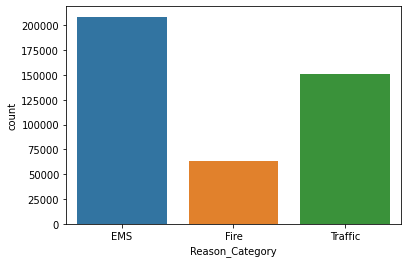

In [21]:
#compare by visualising the data
sns.countplot(x='Reason_Category', data=data)

# Extracting Time Date Data

In [23]:
#checking the timeStamp datatype
type(data['timeStamp'].iloc[0])

str

In [24]:
#convert timestamp string to date time
data['timeStamp'] =pd.to_datetime(data['timeStamp'])

In [25]:
type(data['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

#adding Hour, Month, Day of week column

In [26]:
data['Hour'] = data['timeStamp'].apply(lambda dt: dt.hour)

In [27]:
data['Month'] = data['timeStamp'].apply(lambda dt: dt.month)

In [28]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason_Category,Hour,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12


In [30]:
#adding name of the day
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['Day of Week'] = data['timeStamp'].apply(lambda time: time.dayofweek).map(dmap)
#There is a time.weekday_name attribute that could have produced an equivalent solution, but I wanted to practice mapping a dictionary

In [31]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason_Category,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


# Graphing Reason and Date Data

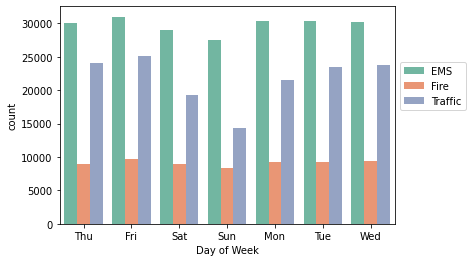

In [35]:
#reason and week day
sns.countplot(x='Day of Week', data=data, hue ='Reason_Category',palette = 'Set2')
plt.legend(loc='lower left',bbox_to_anchor=(1.0,0.5))

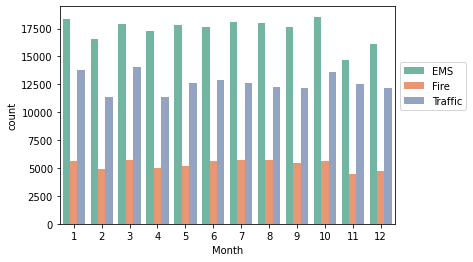

In [37]:
#reason and month
sns.countplot(x='Month', data = data, hue = 'Reason_Category', palette = 'Set2')
plt.legend(loc='lower left',bbox_to_anchor=(1.0,0.5))

It seems that, at a quick glance at these two graphs, we see that Traffic calls are generally reduced on the weekends, and that calls because of fire are much lower in number per month than EMS and Traffic.

In [39]:
#total number of calls per month
data.groupby('Month').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason_Category,Hour,Day of Week
Month,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666
4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583
5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644
6,36171,36171,36171,31501,36171,36171,36152,36171,36171,36171,36171,36171
7,36405,36405,36405,31863,36405,36405,36391,36405,36405,36405,36405,36405
8,35972,35972,35972,31512,35972,35972,35957,35972,35972,35972,35972,35972
9,35339,35339,35339,30772,35339,35339,35325,35339,35339,35339,35339,35339


Text(-8.700000000000003, 0.5, 'count')

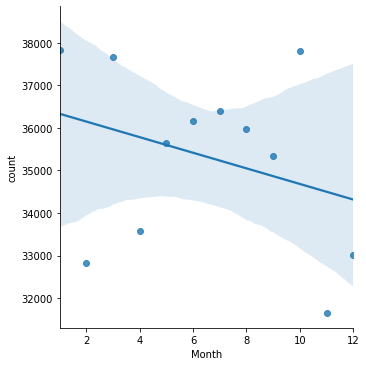

In [40]:
#do a linear regression to see the general trendline and understand our data better.
sns.lmplot(x='Month', y='title', data =data.groupby('Month').count().reset_index())
plt.ylabel('count')

We see from above that the trendline is slightly negative with large variance towards the beginning and ending months of the data set.

# Graphing Timelines

In [44]:
#add date column
data['Date']  =data['timeStamp'].apply(lambda dt: dt.date())
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason_Category,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


Text(0, 0.5, 'count')

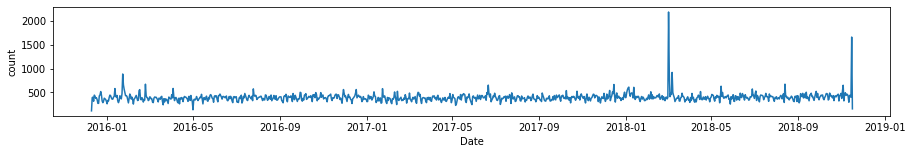

In [45]:
#plot the 911 calls data by date
data.groupby('Date').count().plot.line(use_index = True, y = 'title', figsize= (15,2), legend = None)
plt.ylabel('count')


We notice giant outliers in March of 2018 and in November of 2018.

# investigating outliers


In [47]:
data['Date'] =pd.to_datetime(data['Date'])

Text(0, 0.5, 'count')

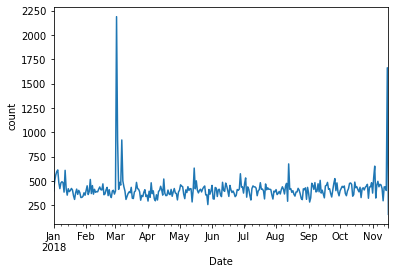

In [48]:
data.groupby(data[data['Date'].dt.year>=2018]['Date']).count().plot.line(use_index = True, y = 'title', legend = None)
plt.ylabel('count')

In [49]:
#analyze the march month data
data.groupby(data[(data['Date'].dt.year>= 2018) & (data['Date'].dt.month==3)]['Date']).count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason_Category,Hour,Month,Day of Week,Date
Date,,,,,,,,,,,,,,
2018-03-01,396,396,396,354,396,396,396,396,396,396,396,396,396,396
2018-03-02,2187,2187,2187,1986,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187
2018-03-03,917,917,917,836,917,917,917,917,917,917,917,917,917,917
2018-03-04,412,412,412,369,412,412,412,412,412,412,412,412,412,412
2018-03-05,484,484,484,439,484,484,484,484,484,484,484,484,484,484
2018-03-06,456,456,456,397,456,456,455,456,456,456,456,456,456,456
2018-03-07,920,920,920,824,920,920,920,920,920,920,920,920,920,920
2018-03-08,499,499,499,449,499,499,499,499,499,499,499,499,499,499
2018-03-09,439,439,439,396,439,439,439,439,439,439,439,439,439,439


We see that, scanning the above table, that on the 2nd there were about 4-5 times the normal amount of calls for the rest of the month. Let's see if we can understand what might have happened on that day from the data we have.

In [51]:
#let's find out what happend on 2nd day
data[data['Date']=='2018-03-02']['Reason_Category'].value_counts()

Traffic    1328
Fire        568
EMS         291
Name: Reason_Category, dtype: int64

<AxesSubplot:xlabel='Reason_Category', ylabel='count'>

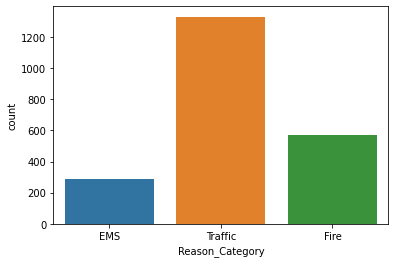

In [53]:
sns.countplot(x='Reason_Category',data=data[data['Date']=='2018-03-02'])

We see that this count distribution looks very different than our original total count distribution for the entire dataset. We can draw from this that there was most likely an event that caused more traffic calls to happen, maybe a big sports game, weather issue, or something else.

In [55]:
#let's find out what happend in November
data.groupby(data[(data['Date'].dt.year>= 2018) & (data['Date'].dt.month==11)]['Date']).count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason_Category,Hour,Month,Day of Week,Date
Date,,,,,,,,,,,,,,
2018-11-01,374,374,374,325,374,374,374,374,374,374,374,374,374,374
2018-11-02,534,534,534,482,534,534,534,534,534,534,534,534,534,534
2018-11-03,651,651,651,562,651,651,650,651,651,651,651,651,651,651
2018-11-04,323,323,323,281,323,323,323,323,323,323,323,323,323,323
2018-11-05,457,457,457,401,457,457,456,457,457,457,457,457,457,457
2018-11-06,495,495,495,441,495,495,495,495,495,495,495,495,495,495
2018-11-07,439,439,439,389,439,439,439,439,439,439,439,439,439,439
2018-11-08,464,464,464,399,464,464,464,464,464,464,464,464,464,464
2018-11-09,458,458,458,418,458,458,458,458,458,458,458,458,458,458


<AxesSubplot:xlabel='Reason_Category', ylabel='count'>

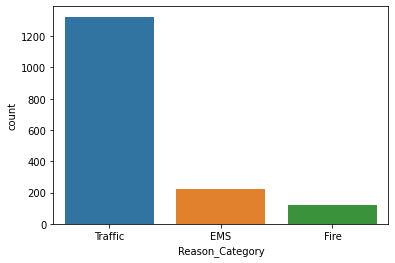

In [56]:
sns.countplot(x='Reason_Category',data=data[data['Date']=='2018-11-15'])

Again, we see that something happened on November 15th. Because the November 15th graph also shows a high count of traffic calls, we have a sense that it could be similar to the March 2nd incident where the cause was extreme weather.

In [59]:
#unstacking and viewing the groupby table so we can find out how to select our data.
data.groupby(['Date','Reason_Category']).count().unstack()

lat               lng              desc               zip  \
Reason_Category  EMS Fire Traffic  EMS Fire Traffic  EMS Fire Traffic  EMS   
Date                                                                         
2015-12-10        58   15      41   58   15      41   58   15      41   53   
2015-12-11       186   68     137  186   68     137  186   68     137  166   
2015-12-12       188   69     145  188   69     145  188   69     145  170   
2015-12-13       191   50      75  191   50      75  191   50      75  179   
2015-12-14       221   39     184  221   39     184  221   39     184  200   
...              ...  ...     ...  ...  ...     ...  ...  ...     ...  ...   
2018-11-12       211   83     144  211   83     144  211   83     144  192   
2018-11-13       187   68     182  187   68     182  187   68     182  168   
2018-11-14       187   54     160  187   54     160  187   54     160  177   
2018-11-15       220  118    1324  220  118    1324  220  118    1324  191   
2018-11-16        45   20      91   45   20      91   45   20      91   42   

                 ...       e Hour              Month              Day of Week  \
Reason_Category  ... Traffic  EMS Fire Traffic   EMS Fire Traffic         EMS   
Date             ...                                                            
2015-12-10       ...      41   58   15      41    58   15      41          58   
2015-12-11       ...     137  186   68     137   186   68     137         186   
2015-12-12       ...     145  188   69     145   188   69     145         188   
2015-12-13       ...      75  191   50      75   191   50      75         191   
2015-12-14       ...     184  221   39     184   221   39     184         221   
...              ...     ...  ...  ...     ...   ...  ...     ...         ...   
2018-11-12       ...     144  211   83     144   211   83     144         211   
2018-11-13       ...     182  187   68     182   187   68     182         187   
2018-11-14       ...     160  187   54     160   187   54     160         187   
2018-11-15       ...    1324  220  118    1324   220  118    1324         220   
2018-11-16       ...      91   45   20      91    45   20      91          45   

                              
Reason_Category Fire Traffic  
Date                          
2015-12-10        15      41  
2015-12-11        68     137  
2015-12-12        69     145  
2015-12-13        50      75  
2015-12-14        39     184  
...              ...     ...  
2018-11-12        83     144  
2018-11-13        68     182  
2018-11-14        54     160  
2018-11-15       118    1324  
2018-11-16        20      91  

[1073 rows x 36 columns]

Text(0, 0.5, 'count')

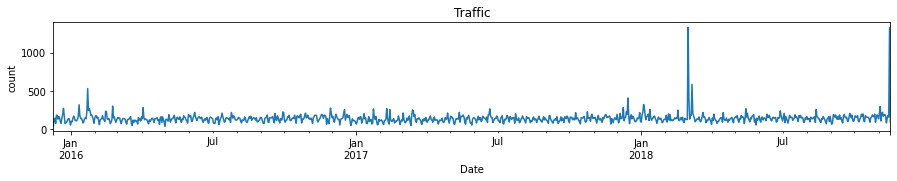

In [62]:
#Traffic
data.groupby(['Date','Reason_Category']).count()['title'].unstack().plot.line(use_index = True, y = 'Traffic', figsize= (15,2), legend = None)
plt.title('Traffic')
plt.ylabel('count')

Text(0, 0.5, 'count')

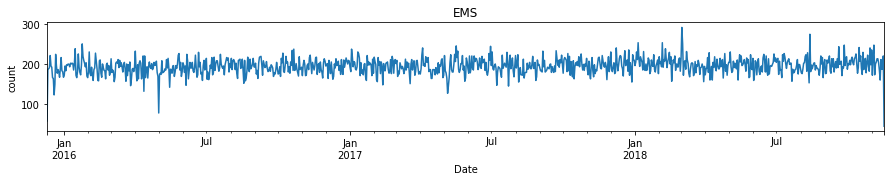

In [64]:
#EMS
data.groupby(['Date','Reason_Category']).count()['title'].unstack().plot.line(use_index = True, y = 'EMS', figsize= (15,2), legend = None)
plt.title('EMS')
plt.ylabel('count')

Text(0, 0.5, 'count')

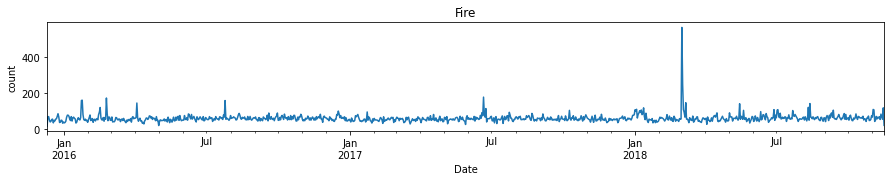

In [65]:
#Fire
data.groupby(['Date','Reason_Category']).count()['title'].unstack().plot.line(use_index = True, y = 'Fire', figsize= (15,2), legend = None)
plt.title('Fire')
plt.ylabel('count')

We see that the first two graphs show us roughly what we expected - the traffic graph having two large outliers that we investigated earlier, and the EMS graph being about average, with the exception of a few datapoints having less than average (because these are not zero, indicating something wrong with the data, and seem like reasonable decreases, we're going to assume that they are part of the natural outliers that you would see in any dataset).

What we didn't notice until now, though, was that, along with the number of traffic calls being high on March 2, 2018, we also see that the number of calls for fire were abnormally high as well. With the count plot earlier, we were simply looking for a difference in distribution, not necessarily in quantity, over each category to denote it being abnormal.

# Heatmap

In [66]:
#First need to change the dataframe to a pivot table with days of week and hours in day
dfht = data.groupby(['Day of Week','Hour']).count().unstack()['title']
dfht

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1185,1001,930,832,821,1051,1676,2689,3185,3295,...,4150,4514,4711,4489,3616,3254,2789,2445,2210,1866
Mon,1207,974,857,784,871,1124,1729,2829,3588,3685,...,3547,3975,4063,4003,3512,2821,2418,2005,1698,1283
Sat,1515,1332,1206,1012,936,985,1230,1640,2211,2766,...,3479,3284,3348,3274,3174,3036,2632,2432,2073,1913
Sun,1520,1331,1263,1033,954,941,1119,1568,1933,2421,...,2992,2828,2855,2872,2829,2679,2362,1994,1632,1470
Thu,1115,873,920,775,784,1091,1801,2913,3468,3457,...,3904,4139,4053,4412,3578,2923,2579,2230,1784,1486
Tue,1086,918,812,783,824,1075,1806,2912,3650,3563,...,3831,4087,4265,4396,3753,2960,2535,2147,1705,1350
Wed,1022,952,808,795,711,1040,1763,3060,3566,3528,...,3933,4149,4443,4487,3609,2927,2645,2236,1794,1399


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

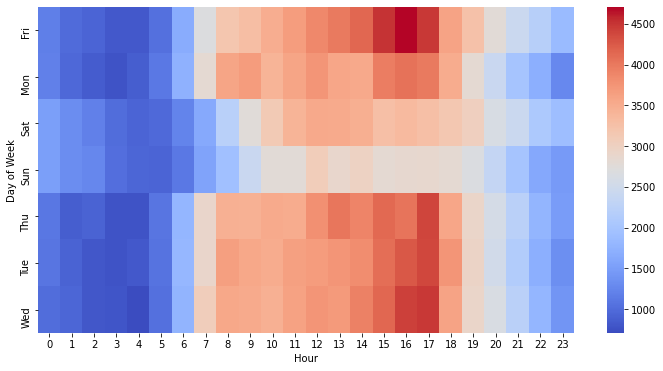

In [67]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(dfht, cmap='coolwarm',ax = ax)

We see that most of the call density comes during the day and most prevelent on business days, which are both expected. Let's look at a cluster map of this data to better understand the similarities.

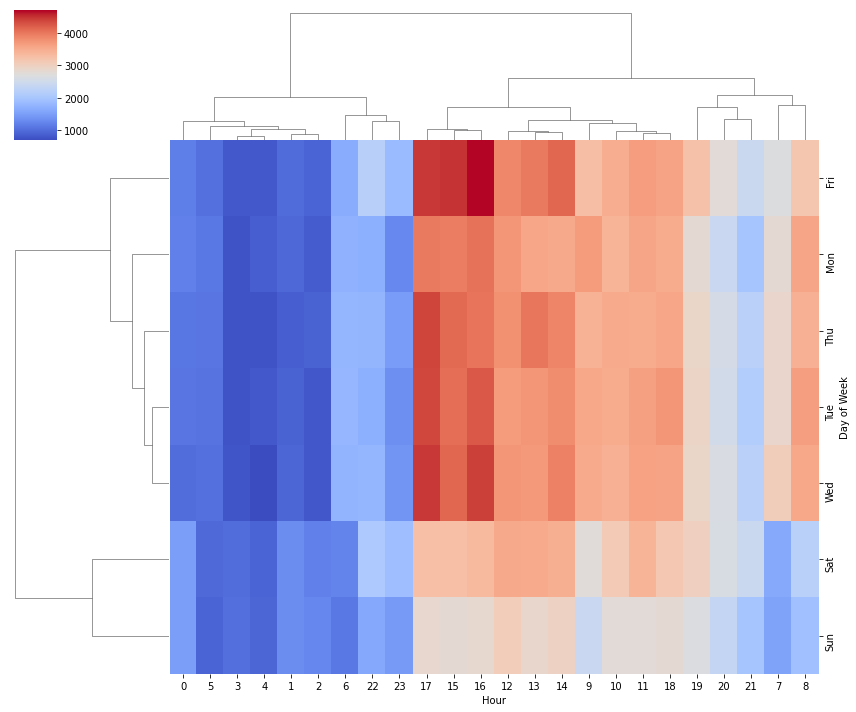

In [68]:
sns.clustermap(dfht, cmap = 'coolwarm', figsize = (12,10))

This cluster map more clearly shows that the hours and days of the week that have the most density are the weekdays during conventional working hours of 9 am to 6 pm.

In [69]:
#Creating the dataframe we'll use
dfmt = data.groupby(['Day of Week','Month']).count().unstack()['title']
dfmt

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,5532,4848,7344,5195,4989,5867,5380,5312,6010,5179,4525,5570
Mon,5716,5214,4663,5154,5019,5045,5792,5212,4675,6385,4157,4286
Sat,5103,4431,4914,4947,4275,4868,4883,4355,5023,5051,4043,5200
Sun,4882,3806,3569,4628,3940,4019,5114,3963,4245,4852,3210,3896
Thu,4985,4708,6010,4637,5469,5951,4954,5328,5300,4940,5978,4899
Tue,6118,4755,5090,4413,6203,5013,5488,5690,4930,5827,4823,4691
Wed,5488,5066,6076,4609,5749,5408,4794,6112,5156,5581,4907,4477


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

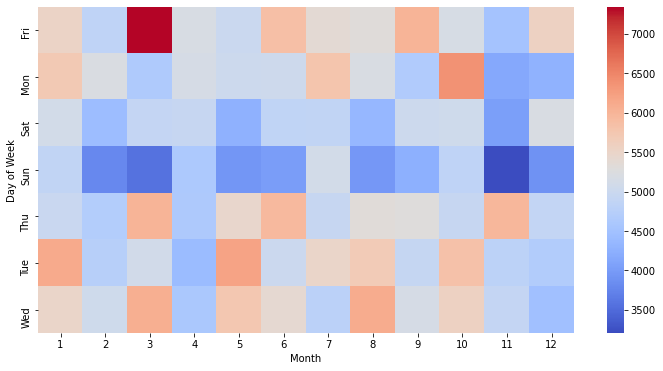

In [70]:
#Heatmap
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(dfmt, cmap='coolwarm', ax = ax)

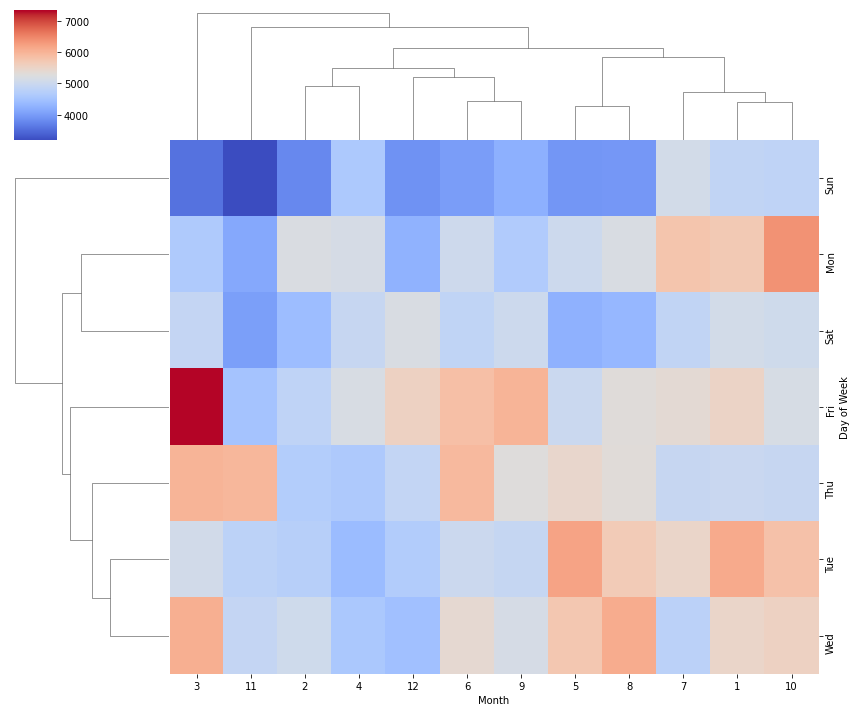

In [71]:
#let's make a cluster map of the same information
sns.clustermap(dfmt, cmap = 'coolwarm', figsize = (12,10))